# Regularization
Reducing the variance in our model. The more complex a model is, the more it will vary according to our training data. This results in poor performance when applied on test data ie Overfitting. Regularization reduces the variance of our model by incorporating penalties for magnitude of coefficients of variable ($\beta_i$). 

Regularisation is also used for removing less important features as it reduces coeff of these features to zero or approximately zero. Hence it is also a feature selection technique.

Techniques:
1. Ridge Regression
2. Lasso

In [1]:
# import libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Let RSS be
RSS = $\sum_{i=1}^{n} (y_i-\beta_0-\sum_{j=1}^{p}\beta_jx_{ji})$ <br />
where p = No. of Parameters or variables <br />
$\beta_j$ = Coefficients <br />

## 1. Ridge Regression 
Instead of MSE or RSS, cost function is modified as: <br />
Cost = $[RSS + \lambda\sum_{j=1}^{p}(\beta_j)^2]$

A penalty is applied for $(\beta_j)^2$ in the cost function which tends to reduce the coefficients of variables.

## 2. Lasso
Instead of MSE or RSS, cost function is modified as: <br />
Cost = $[RSS + \lambda\sum_{j=1}^{p}\lvert\beta_j\rvert]$

A penalty is applied for $(\lvert\beta_j\rvert)$ in the cost function which tends to reduce the coefficients of variables.

In [2]:
# a method to split dataset into train and test with given ratio
def split_test_train(x, y, ratio = 0.8):
    rint = np.arange(x.shape[0], dtype='int')
    np.random.shuffle(rint)
    # number of data points in training set
    num = int(x.shape[0] * ratio)
    x_train = x[rint[0:num]]
    y_train = y[rint[0:num]]
    x_test = x[rint[num:x.shape[0]]]
    y_test = y[rint[num:x.shape[0]]]
    return x_train, y_train, x_test, y_test

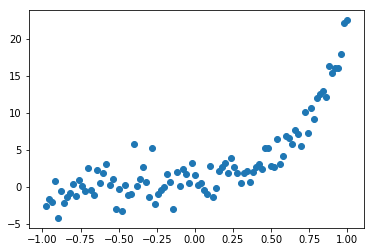

In [3]:
# load a polynomial dataset from csv - easy way
df = pd.read_csv('Datasets/ship_speed_fuel.csv')
x = df.iloc[:, 0]
y = df.iloc[:, 1]

# plot data
plt.scatter(x, y)
plt.show()

In [4]:
# build a polynomial model of given degree
def build_polynomial_model(X, degree):
    # initialize weights and bias with random values
    w = tf.Variable([np.random.randn()] * (degree + 1), name = 'weights')
    
    terms = []
    # add polynomial terms upto degree specified
    for i in range(degree + 1):
        term = tf.multiply(w[i], tf.pow(X, i))
        terms.append(term)
    
    model = tf.add_n(terms)
    
    return model, w

In [5]:
def train_model(epochs, degree, learning_rate, split_ratio, is_ridge = True):
    x_train , y_train, x_test, y_test = split_test_train(x, y, split_ratio)
    
    X = tf.placeholder(dtype = tf.float32)
    Y = tf.placeholder(dtype = tf.float32)

    y_model, w = build_polynomial_model(X, degree)

    # Mean squared error
    mse = tf.reduce_mean(tf.square(Y - y_model))

    # cost function
    lmda = tf.placeholder(dtype = tf.float32)
    RSS = tf.reduce_sum(tf.square(Y - y_model))
    if is_ridge:        
        penalty = tf.multiply(lmda, tf.reduce_sum(tf.square(w)))
    else:
        penalty = tf.multiply(lmda, tf.reduce_sum(tf.abs(w)))
    cost = tf.add(RSS, penalty)

    # training operation
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    # start a session, this time, an interactive session
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()

    etrain = []
    etest = []

    for l in np.linspace(0, 1, 100):
        # passing whole data to optimiser
        for i in range(epochs):
            sess.run(train_op, feed_dict = {X: x_train, Y: y_train, lmda: l})

        print('weight={}, MSE={}'.format(sess.run(w), sess.run(mse, feed_dict = {X: x_train, Y: y_train})))
        train_error = sess.run(mse, feed_dict={X: x_train, Y: y_train})
        test_error = sess.run(mse, feed_dict={X: x_test, Y: y_test})

        etrain.append(train_error)
        etest.append(test_error)

    sess.close()
    
    return etrain, etest

In [23]:
# train model
epochs = 100
degree = 4
learning_rate = 0.001
split_ratio = 0.5
# set is_ridge to False for lasso
is_ridge = True

etrain, etest = train_model(epochs, degree, learning_rate, split_ratio, is_ridge)

weight=[1.4830753 4.33759   3.6278057 3.9922705 3.0148573], MSE=4.336316108703613
weight=[0.99603814 3.7675111  4.413312   5.098087   3.9799695 ], MSE=3.6275899410247803
weight=[0.86194915 3.2199495  4.5831547  6.0151887  4.3641906 ], MSE=3.352485418319702
weight=[0.83323723 2.751996   4.5688815  6.7964687  4.5603604 ], MSE=3.172889471054077
weight=[0.8357261 2.355495  4.5035067 7.4577575 4.690815 ], MSE=3.0430748462677
weight=[0.8467517 2.021811  4.42753   8.013639  4.793826 ], MSE=2.9480578899383545
weight=[0.85946476 1.7430282  4.353012   8.477406   4.881723  ], MSE=2.878464460372925
weight=[0.87185484 1.5120368  4.283331   8.860974   4.958824  ], MSE=2.8275225162506104
weight=[0.88338846 1.322507   4.2192245  9.174958   5.0269294 ], MSE=2.7902660369873047
weight=[0.8939732 1.1688194 4.1606503 9.428778  5.0870333], MSE=2.763058662414551
weight=[0.90364575 1.0460172  4.1073465  9.630734   5.139843  ], MSE=2.7432568073272705
weight=[0.9124748 0.9497315 4.059005  9.788153  5.1859365], 

weight=[1.0915089 2.5423765 3.9472446 6.678497  4.2127466], MSE=3.2764053344726562
weight=[1.0933189 2.5539603 3.9459317 6.654224  4.2033577], MSE=3.283237934112549


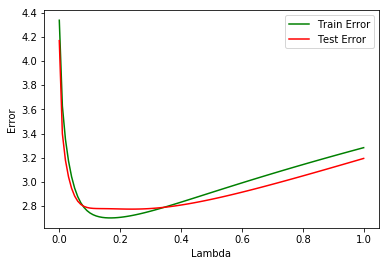

In [24]:
# plot the results
lmbda = np.linspace(0, 1, 100)
plt.plot(lmbda, etrain, 'g', label = 'Train Error')
plt.plot(lmbda, etest, 'r', label = 'Test Error')
plt.legend()
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.show()

12.8
